INFO: modified dataset already created


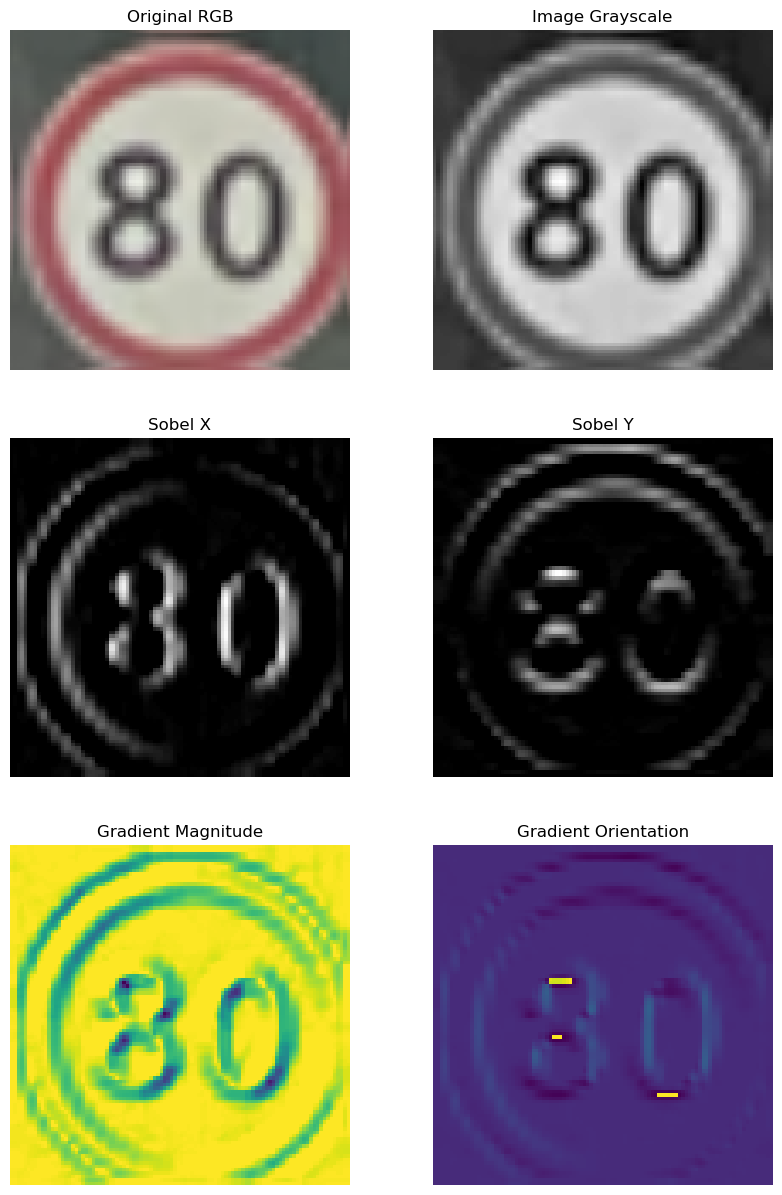

In [1]:
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import preprocessing

_, _, _, _ = preprocessing.get_dataset() # just to create the modified_dataset folder

image_path = Path("modified_dataset/cropped_images/image_100.png")
image = cv2.imread(str(image_path))

# RGB image (for display)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGR to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 8 bit encoding

# Image in float encoding and scaled to have values [128-255]
image_gray_f64 = image_gray.astype(np.float64)
image_gray_f64 = image_gray_f64 / 2 + 128

# Calculate gradient value and magnitude
# images scaled [0-127] negative gradients [128-255] positive gradients
image_dx_disp = cv2.Sobel(image_gray_f64, 0, dx=1, dy=0)  # uint8
image_dy_disp = cv2.Sobel(image_gray_f64, 0, dx=0, dy=1)
# Negative gradients
image_dx = (image_dx_disp.astype(np.float64) - 128) * 2  # np.float64
image_dy = (image_dy_disp.astype(np.float64) - 128) * 2
magnitude = np.sqrt(image_dx ** 2 + image_dy ** 2)
direction = np.arctan2(image_dy.astype(np.float64), image_dx.astype(np.float64))

# Plot images
fig = plt.figure(figsize=(10, 15))
rows, columns = 3, 2

fig.add_subplot(rows, columns, 1)
plt.title("Original RGB")
plt.axis("off")
plt.imshow(image_rgb)

fig.add_subplot(rows, columns, 2)
plt.title("Image Grayscale")
plt.axis("off")
plt.imshow(image_gray, cmap="gray")

fig.add_subplot(rows, columns, 3)
plt.title("Sobel X")
plt.axis("off")
plt.imshow(image_dx_disp, cmap="gray")

fig.add_subplot(rows, columns, 4)
plt.title("Sobel Y")
plt.axis("off")
plt.imshow(image_dy, cmap="gray")

fig.add_subplot(rows, columns, 5)
plt.title("Gradient Magnitude")
plt.axis("off")
plt.imshow(magnitude)

fig.add_subplot(rows, columns, 6)
plt.title("Gradient Orientation")
plt.axis("off")
plt.imshow(direction)


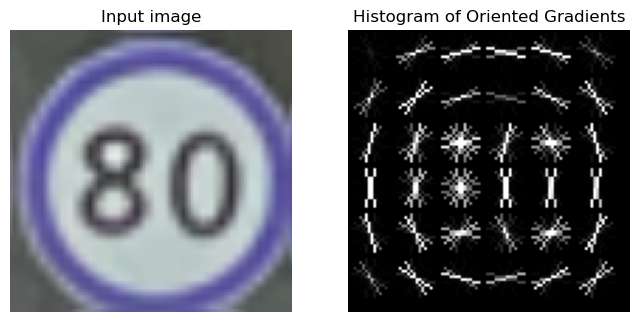

In [2]:
from skimage.feature import hog
from skimage import exposure

fd, hog_image = hog(
    image_gray,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis("off")
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title("Input image")

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis("off")
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title("Histogram of Oriented Gradients")
plt.show()
